In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('C:/Users/lyona/Documents/MLOps/Tugas2/data/iris.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [26]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [27]:
df.duplicated().sum()

1

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

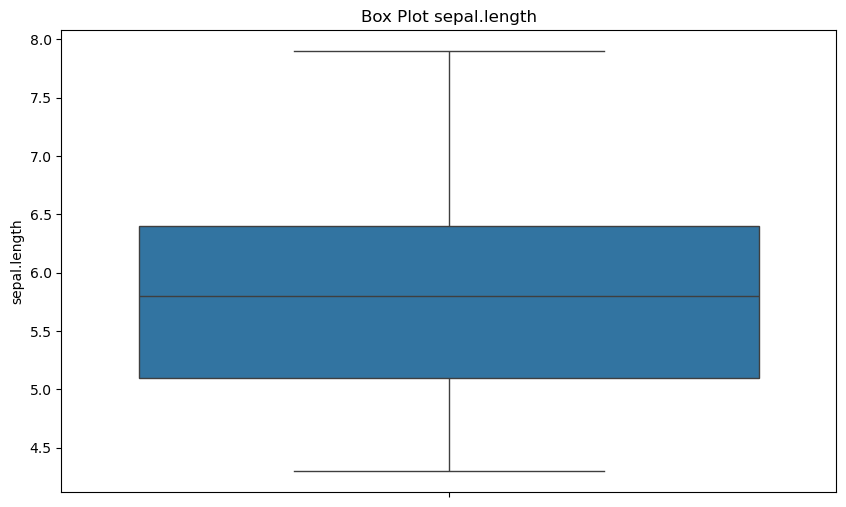

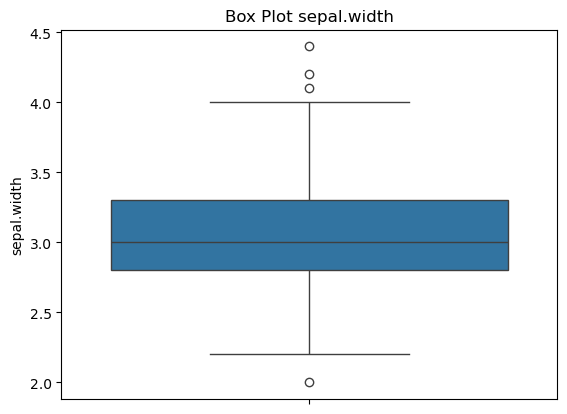

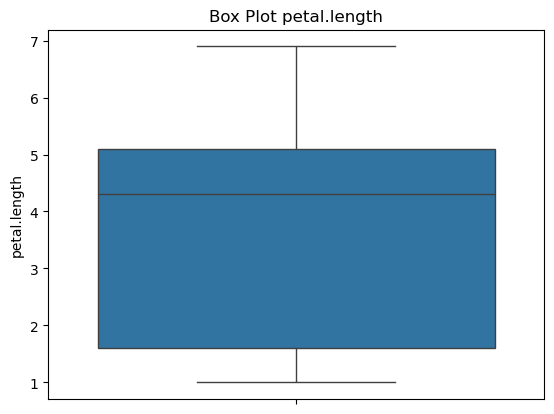

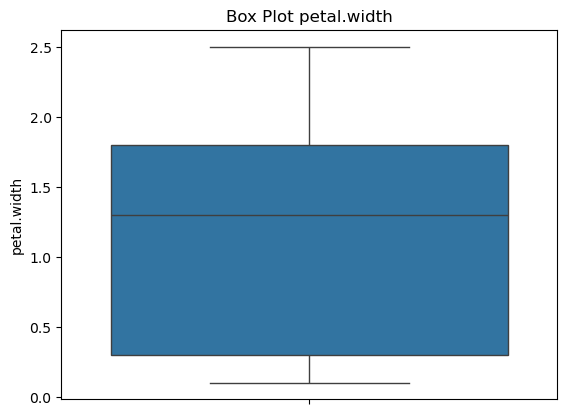

In [29]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    if df[column].dtype != 'object':
        sns.boxplot(y=pd.to_numeric(df[column]))
        plt.title(f'Box Plot {column}')
        plt.ylabel(column)
        plt.show()

In [30]:
kolom_numerik = df.select_dtypes(include=['float64', 'int64'])

Q1 = kolom_numerik.quantile(0.25)
Q3 = kolom_numerik.quantile(0.75)
IQR = Q3 - Q1

In [31]:
lower_limit = Q1['sepal.width'] - 1.5 * IQR['sepal.width']
upper_limit = Q3['sepal.width'] + 1.5 * IQR['sepal.width']

df_cleaned = df[(df['sepal.width'] >= lower_limit) & (df['sepal.width'] <= upper_limit)]

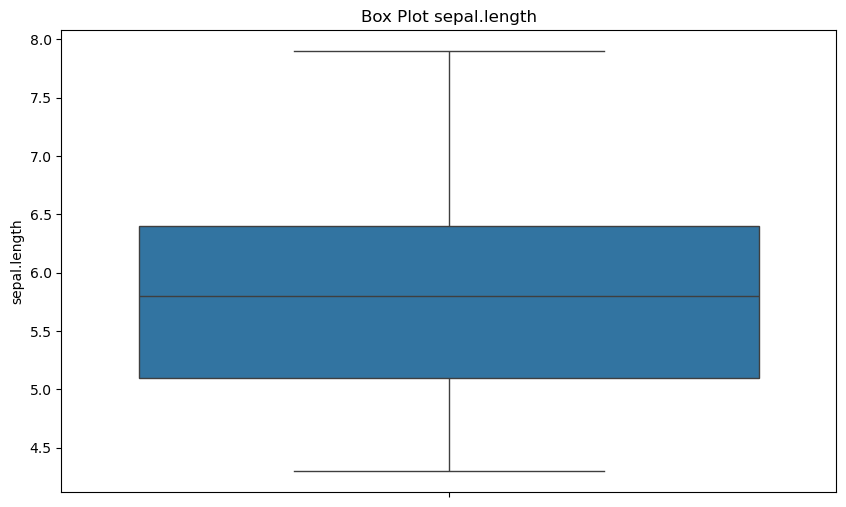

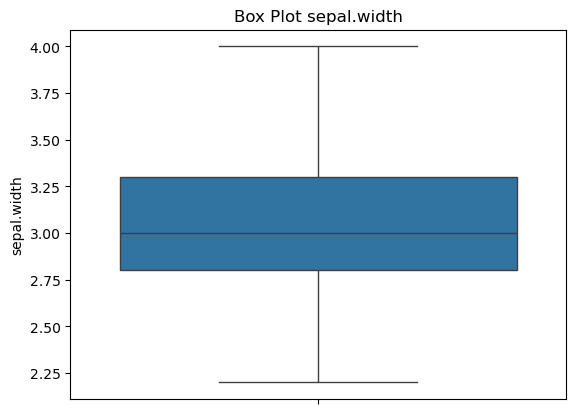

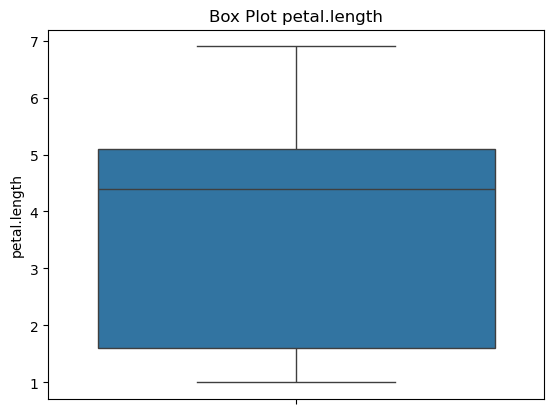

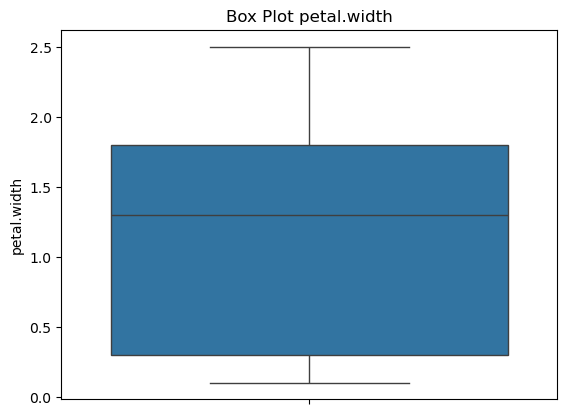

In [32]:
plt.figure(figsize=(10, 6))
for column in df_cleaned.columns:
    if df_cleaned[column].dtype != 'object':
        sns.boxplot(y=pd.to_numeric(df_cleaned[column]))
        plt.title(f'Box Plot {column}')
        plt.ylabel(column)
        plt.show()

In [33]:
variety = df_cleaned['variety']
kolom_numerik_cleaned = df_cleaned.drop(columns=['variety'])

In [34]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
kolom_numerik_normalized = pd.DataFrame(scaler.fit_transform(kolom_numerik_cleaned), columns=kolom_numerik_cleaned.columns)

df_normalized = kolom_numerik_normalized.copy()
df_normalized['variety'] = variety.reset_index(drop=True)

In [35]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  145 non-null    float64
 1   sepal.width   145 non-null    float64
 2   petal.length  145 non-null    float64
 3   petal.width   145 non-null    float64
 4   variety       145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


### MODELING

In [55]:
df_p = pd.read_csv('C:/Users/lyona/Documents/MLOps/Tugas2/data/processed_iris.csv')

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

X = df_p.drop(columns=['variety'])
y = df_p['variety']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [66]:
param_grid = {'max_depth': range(1, 11)}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_accuracy = grid_search.best_score_

print(f"{best_max_depth}, {best_accuracy}")

3, 0.9818181818181818


In [67]:
model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [68]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [69]:
evaluation_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

print(evaluation_metrics)

{'accuracy': 0.9310344827586207, 'precision': 0.9416445623342174, 'recall': 0.9310344827586207, 'f1_score': 0.9295977011494252}
